In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#  Initial Data Assesment

In [2]:
# Load the Data from CSV
car08_df = pd.read_csv('all_alpha_08.csv')
car18_df = pd.read_csv('all_alpha_18.csv')

In [3]:
# Understanding the different columns (features) in each Data Set
car08_df.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [4]:
car18_df.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4NH3,small car,3,25,35,29,6,No,309
1,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXV02.4NH3,small car,3,25,35,29,6,No,309
2,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV03.08H3,small SUV,3,26,27,27,6,No,330
3,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXV03.08H3,small SUV,3,26,27,27,6,No,330
4,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV03.5RH3,small SUV,3,19,27,22,4,No,404


# Data Assesment

- number of samples in each dataset
- number of columns in each dataset
- duplicate rows in each dataset
- datatypes of columns
- features with missing values
- number of non-null unique values for features in each dataset
- what those unique values are and counts for each

In [5]:
# number of samples in each dataset
# number of columns in each dataset
car08_df.shape,car18_df.shape

((2404, 18), (2682, 18))

In [6]:
# duplicate rows in each dataset
car08_df.duplicated().sum(), car18_df.duplicated().sum()

(25, 0)

In [7]:
# datatypes of columns
# features with missing values
# number of non-null unique values for features in each dataset
car08_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
Model                   2404 non-null object
Displ                   2404 non-null float64
Cyl                     2205 non-null object
Trans                   2205 non-null object
Drive                   2311 non-null object
Fuel                    2404 non-null object
Sales Area              2404 non-null object
Stnd                    2404 non-null object
Underhood ID            2404 non-null object
Veh Class               2404 non-null object
Air Pollution Score     2404 non-null object
FE Calc Appr            2205 non-null object
City MPG                2205 non-null object
Hwy MPG                 2205 non-null object
Cmb MPG                 2205 non-null object
Unadj Cmb MPG           2205 non-null float64
Greenhouse Gas Score    2205 non-null object
SmartWay                2404 non-null object
dtypes: float64(2), object(16)
memory usage: 338.1+ KB


In [8]:
car18_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2682 entries, 0 to 2681
Data columns (total 18 columns):
Model                   2682 non-null object
Displ                   2637 non-null float64
Cyl                     2637 non-null float64
Trans                   2682 non-null object
Drive                   2682 non-null object
Fuel                    2682 non-null object
Cert Region             2682 non-null object
Stnd                    2682 non-null object
Stnd Description        2682 non-null object
Underhood ID            2682 non-null object
Veh Class               2682 non-null object
Air Pollution Score     2682 non-null int64
City MPG                2682 non-null object
Hwy MPG                 2682 non-null object
Cmb MPG                 2682 non-null object
Greenhouse Gas Score    2682 non-null int64
SmartWay                2682 non-null object
Comb CO2                2682 non-null object
dtypes: float64(2), int64(2), object(14)
memory usage: 377.2+ KB


In [9]:
# Get all Duplicated Data in the Data Set
car08_df[car08_df.duplicated()]

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
752,DODGE Sprinter 2500,3.5,NaN,NaN,NaN,Gasoline,FA,B8,8MBXT03.5BN8,van,3,NaN,NaN,NaN,NaN,NaN,NaN,no
754,DODGE Sprinter 2500,3.5,NaN,NaN,NaN,Gasoline,CA,B8,8MBXT03.5BN8,van,3,NaN,NaN,NaN,NaN,NaN,NaN,no
769,FORD E150,4.6,NaN,NaN,NaN,Gasoline,FA,B8,8FMXT04.65HA,van,3,NaN,NaN,NaN,NaN,NaN,NaN,no
771,FORD E150,4.6,NaN,NaN,NaN,Gasoline,CA,U2,8FMXT04.65HA,van,3,NaN,NaN,NaN,NaN,NaN,NaN,no
773,FORD E150,5.4,NaN,NaN,NaN,Gasoline,FA,B8,8FMXT05.45H2,van,3,NaN,NaN,NaN,NaN,NaN,NaN,no
775,FORD E150,5.4,NaN,NaN,NaN,Gasoline,CA,U2,8FMXT05.45H2,van,3,NaN,NaN,NaN,NaN,NaN,NaN,no
794,FORD E350,5.4,NaN,NaN,NaN,Gasoline,FA,B8,8FMXT05.45H2,van,3,NaN,NaN,NaN,NaN,NaN,NaN,no
797,FORD E350,5.4,NaN,NaN,NaN,Gasoline,CA,U2,8FMXT05.45H2,van,3,NaN,NaN,NaN,NaN,NaN,NaN,no
800,FORD E350,5.4,NaN,NaN,NaN,Gasoline,FA,HDV,8FMXK05.46R3,van,2,NaN,NaN,NaN,NaN,NaN,NaN,no
958,FREIGHTLINER 2500,3.5,NaN,NaN,NaN,Gasoline,FA,B8,8MBXT03.5BN8,van,3,NaN,NaN,NaN,NaN,NaN,NaN,no


In [10]:
# features with missing values
car08_df.isnull().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

In [11]:
car08_df.nunique()

Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64

In [12]:
# Get all rows with missing infomraiton (any column with missing Data)
null_data_08 = car08_df[car08_df.isnull().any(axis=1)]

In [13]:
null_data_08.shape

(199, 18)

In [14]:
# Get all Unique values in a specifc Column
car08_df.Fuel.unique()

array(['Gasoline', 'ethanol/gas', 'ethanol', 'diesel', 'CNG'],
      dtype=object)

In [15]:
# Get all Unique values in a specifc Column
car18_df.Fuel.unique()

array(['Gasoline', 'Gasoline/Electricity', 'Diesel', 'Electricity',
       'Ethanol/Gas', 'Hydrogen'], dtype=object)

# Cleaning the Data

In [16]:
car08_df.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd',
       'Underhood ID', 'Veh Class', 'Air Pollution Score', 'FE Calc Appr',
       'City MPG', 'Hwy MPG', 'Cmb MPG', 'Unadj Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [17]:
# Change slaes Area column to Cert Region
car08_df.rename(columns={'Sales Area':'Cert Region'},inplace=True)

In [18]:
# replace spaces with underscores and lowercase labels for 2008 dataset
car08_df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# replace spaces with underscores and lowercase labels for 2008 dataset
car18_df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [19]:
car08_df.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'stnd', 'underhood_id', 'veh_class', 'air_pollution_score',
       'fe_calc_appr', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'unadj_cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [20]:
# Drop unneded columns not critical in analysis
car08_df.drop(['stnd','underhood_id','fe_calc_appr','unadj_cmb_mpg'],axis=1,inplace=True)

In [21]:
car18_df.drop(['stnd','stnd_description','underhood_id','comb_co2'],axis=1,inplace=True)

In [22]:
car08_df.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [23]:
car18_df.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,small car,3,25,35,29,6,No


## Filter Data

In [24]:
# Only keey data from California
car08_df.query('cert_region == "CA"',inplace=True)

In [28]:
car08_df.shape

(1084, 14)

In [35]:
car08_df.drop('cert_region',axis=1,inplace=True)

In [36]:
car08_df.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,midsize car,7,16,24,19,5,no
6,ACURA TL,3.2,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,18,26,21,6,yes
7,ACURA TL,3.5,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,17,26,20,6,yes


In [ ]:
car18_df.query('cert_region == "CA"',inplace=True)

In [31]:
car18_df.shape

(1322, 14)

In [ ]:
car18_df.drop('cert_region',axis=1,inplace=True)

In [33]:
car18_df.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,small car,3,25,35,29,6,No
2,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,small SUV,3,26,27,27,6,No
4,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,small SUV,3,19,27,22,4,No
5,ACURA MDX,3.5,6.0,SemiAuto-9,2WD,Gasoline,small SUV,3,20,27,23,5,No
8,ACURA MDX,3.5,6.0,SemiAuto-9,4WD,Gasoline,small SUV,3,18,26,21,4,No


## Drop Rows with Missing Values

In [38]:
car08_df.isnull().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [39]:
car08_df.dropna(inplace=True)

In [40]:
car08_df.isnull().sum().any()

False

In [41]:
car08_df.shape

(1009, 13)

In [42]:
car18_df.isnull().sum()

model                    0
displ                   20
cyl                     20
trans                    0
drive                    0
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                 0
hwy_mpg                  0
cmb_mpg                  0
greenhouse_gas_score     0
smartway                 0
dtype: int64

In [43]:
car18_df.dropna(inplace=True)

In [44]:
car18_df.isnull().sum().any()

False

In [45]:
car18_df.isnull().sum()

model                   0
displ                   0
cyl                     0
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

## Drop Duplicate Rows

In [46]:
car08_df.duplicated().sum(),car18_df.duplicated().sum()

(23, 10)

In [47]:
car08_df.drop_duplicates(inplace=True)
car18_df.drop_duplicates(inplace=True)

In [48]:
car08_df.shape,car18_df.shape

((986, 13), (1292, 13))

In [49]:
car08_df.to_csv('car_08.csv',index=False)
car18_df.to_csv('car_18.csv',index=False)

# Fixing Data Type

In [50]:
type(car08_df.cyl[0]),car08_df.cyl[0]

(str, '(6 cyl)')

In [51]:
car08_df.cyl.unique()

array(['(6 cyl)', '(4 cyl)', '(12 cyl)', '(8 cyl)', '(10 cyl)',
       '(16 cyl)', '(5 cyl)', '(2 cyl)'], dtype=object)

In [52]:
car08_df.cyl.value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [53]:
car08_df.cyl[6].strip('(').split(' ')[0]

'6'

In [54]:
car08_df.cyl = car08_df.cyl.str.extract('(\d+)').astype(int)

In [55]:
car18_df.cyl = car18_df.cyl.astype(int)

In [87]:
car08_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 0 to 2400
Data columns (total 13 columns):
model                   986 non-null object
displ                   986 non-null float64
cyl                     986 non-null int64
trans                   986 non-null object
drive                   986 non-null object
fuel                    986 non-null object
veh_class               986 non-null object
air_pollution_score     986 non-null object
city_mpg                986 non-null object
hwy_mpg                 986 non-null object
cmb_mpg                 986 non-null object
greenhouse_gas_score    986 non-null object
smartway                986 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 147.8+ KB


In [57]:
car18_df.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA ILX,2.4,4,AMS-8,2WD,Gasoline,small car,3,25,35,29,6,No
2,ACURA MDX,3.0,6,AMS-7,4WD,Gasoline,small SUV,3,26,27,27,6,No
4,ACURA MDX,3.5,6,SemiAuto-9,2WD,Gasoline,small SUV,3,19,27,22,4,No
5,ACURA MDX,3.5,6,SemiAuto-9,2WD,Gasoline,small SUV,3,20,27,23,5,No
8,ACURA MDX,3.5,6,SemiAuto-9,4WD,Gasoline,small SUV,3,18,26,21,4,No


In [ ]:
# Try this solution First
# It will fail
car08_df.air_pollution_score.astype(float)

In [79]:
# Filter the Data to locate the cell with value 6/4
car08_df[car08_df.air_pollution_score == '6/4']

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [81]:
# Validate its index (by default the index will be numbers)
car08_df.loc[car08_df.air_pollution_score == '6/4'].index

Int64Index([1550], dtype='int64')

In [82]:
# Get the exact location for this location
car08_df.index.get_loc(1550)

582

In [ ]:
car08_df.iloc[582]

### Data Transformation

In [89]:
# Get all items with / in Fuel -- Hybrid cars
hb_08 = car08_df[car08_df.fuel.str.contains('/')]
hb_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [91]:
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [92]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [94]:
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [95]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [97]:
# drop the original hybrid rows
car08_df.drop(hb_08.index, inplace=True)

# add in our newly separated rows
car08_df = car08_df.append(new_rows, ignore_index=True)

In [102]:
# check that all the original hybrid rows with "/"s are gone
car08_df[car08_df['fuel'].str.contains('/')]
car08_df.shape

(987, 13)

In [106]:
car18_df.shape

(1292, 13)

In [107]:
## We Do the same for Data set 2018
hb_18 = car18_df[car18_df.fuel.str.contains('/')]
hb_18.shape

(76, 13)

In [115]:
hb_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
57,AUDI A3 e-tron,1.4,4,AMS-6,2WD,Gasoline/Electricity,small car,7,34/81,39/86,36/83,10,Elite
173,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
225,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
227,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
257,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes


In [116]:
df1 = hb_18.copy()
df2 = hb_18.copy()

In [117]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 57 to 2680
Data columns (total 13 columns):
model                   76 non-null object
displ                   76 non-null float64
cyl                     76 non-null int64
trans                   76 non-null object
drive                   76 non-null object
fuel                    76 non-null object
veh_class               76 non-null object
air_pollution_score     76 non-null int64
city_mpg                76 non-null object
hwy_mpg                 76 non-null object
cmb_mpg                 76 non-null object
greenhouse_gas_score    76 non-null int64
smartway                76 non-null object
dtypes: float64(1), int64(3), object(9)
memory usage: 8.3+ KB


In [118]:
# columns to split by "/"
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])

In [122]:
# combine dataframes to add to the original dataframe
new_rows = df1.append(df2)

# now we have separate rows for each fuel type of each vehicle!
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
57,AUDI A3 e-tron,1.4,4,AMS-6,2WD,Gasoline,small car,7,34,39,36,10,Elite
173,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,3,28,34,30,10,Yes
225,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,7,27,31,29,10,Elite
227,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline,small car,7,27,31,28,10,Elite
257,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline,large car,3,25,29,27,9,Yes
342,BMW X5 xDrive40e,2.0,4,SemiAuto-8,4WD,Gasoline,standard SUV,3,23,25,24,8,Yes
353,BMW i3 (94Ah),0.6,2,Auto-1,2WD,Gasoline,small car,7,36,33,35,10,Elite
357,BMW i3s (94Ah),0.6,2,Auto-1,2WD,Gasoline,small car,7,36,33,35,10,Elite
416,CADILLAC CT6 Plug-In,2.0,4,CVT,2WD,Gasoline,midsize car,3,23,29,25,10,Yes
530,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol,large car,5,14,20,16,4,No


In [123]:
car18_df.drop(hb_18.index,inplace=True)

In [124]:
car18_df = car18_df.append(new_rows,ignore_index=True)

In [125]:
car18_df.shape

(1368, 13)

In [126]:
car18_df.count()

model                   1368
displ                   1368
cyl                     1368
trans                   1368
drive                   1368
fuel                    1368
veh_class               1368
air_pollution_score     1368
city_mpg                1368
hwy_mpg                 1368
cmb_mpg                 1368
greenhouse_gas_score    1368
smartway                1368
dtype: int64

In [129]:
car08_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 13 columns):
model                   987 non-null object
displ                   987 non-null float64
cyl                     987 non-null int64
trans                   987 non-null object
drive                   987 non-null object
fuel                    987 non-null object
veh_class               987 non-null object
air_pollution_score     987 non-null object
city_mpg                987 non-null object
hwy_mpg                 987 non-null object
cmb_mpg                 987 non-null object
greenhouse_gas_score    987 non-null object
smartway                987 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 100.3+ KB


In [140]:
car08_df.air_pollution_score = car08_df.air_pollution_score.astype(float)
car08_df.greenhouse_gas_score = car08_df.greenhouse_gas_score.astype(int)

In [141]:
car08_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 13 columns):
model                   987 non-null object
displ                   987 non-null float64
cyl                     987 non-null int64
trans                   987 non-null object
drive                   987 non-null object
fuel                    987 non-null object
veh_class               987 non-null object
air_pollution_score     987 non-null float64
city_mpg                987 non-null object
hwy_mpg                 987 non-null object
cmb_mpg                 987 non-null object
greenhouse_gas_score    987 non-null int64
smartway                987 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 100.3+ KB


In [142]:
car18_df.air_pollution_score = car18_df.air_pollution_score.astype(float)
car18_df.greenhouse_gas_score = car18_df.greenhouse_gas_score.astype(int)
car18_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 13 columns):
model                   1368 non-null object
displ                   1368 non-null float64
cyl                     1368 non-null int64
trans                   1368 non-null object
drive                   1368 non-null object
fuel                    1368 non-null object
veh_class               1368 non-null object
air_pollution_score     1368 non-null float64
city_mpg                1368 non-null object
hwy_mpg                 1368 non-null object
cmb_mpg                 1368 non-null object
greenhouse_gas_score    1368 non-null int64
smartway                1368 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 139.0+ KB


In [143]:
car18_df.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA ILX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,25,35,29,6,No
1,ACURA MDX,3.0,6,AMS-7,4WD,Gasoline,small SUV,3.0,26,27,27,6,No
2,ACURA MDX,3.5,6,SemiAuto-9,2WD,Gasoline,small SUV,3.0,19,27,22,4,No
3,ACURA MDX,3.5,6,SemiAuto-9,2WD,Gasoline,small SUV,3.0,20,27,23,5,No
4,ACURA MDX,3.5,6,SemiAuto-9,4WD,Gasoline,small SUV,3.0,18,26,21,4,No


- Fix city_mpg, hwy_mpg, cmb_mpg datatypes
    - 2008 and 2018: convert string to float.

In [147]:
mpg_col = ['city_mpg','hwy_mpg','cmb_mpg']
for c in mpg_col:
    car08_df[c] = car08_df[c].astype(float)
    car18_df[c] = car18_df[c].astype(float)

In [149]:
car18_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 13 columns):
model                   1368 non-null object
displ                   1368 non-null float64
cyl                     1368 non-null int64
trans                   1368 non-null object
drive                   1368 non-null object
fuel                    1368 non-null object
veh_class               1368 non-null object
air_pollution_score     1368 non-null float64
city_mpg                1368 non-null float64
hwy_mpg                 1368 non-null float64
cmb_mpg                 1368 non-null float64
greenhouse_gas_score    1368 non-null int64
smartway                1368 non-null object
dtypes: float64(5), int64(2), object(6)
memory usage: 139.0+ KB


In [150]:
car08_df.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [152]:
# Save your new CLEAN datasets as new files!
car08_df.to_csv('clean_08.csv', index=False)
car18_df.to_csv('clean_18.csv', index=False)

# Exploration with Visuals

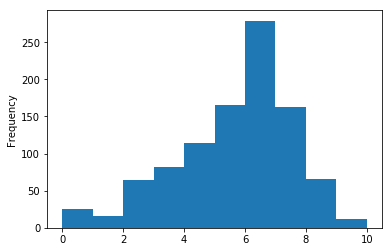

In [154]:
car08_df.greenhouse_gas_score.plot(kind='hist');

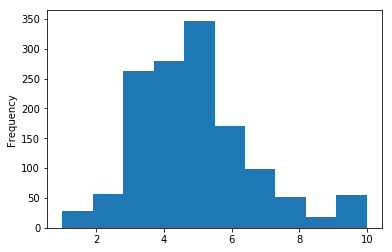

In [155]:
car18_df.greenhouse_gas_score.plot(kind='hist');

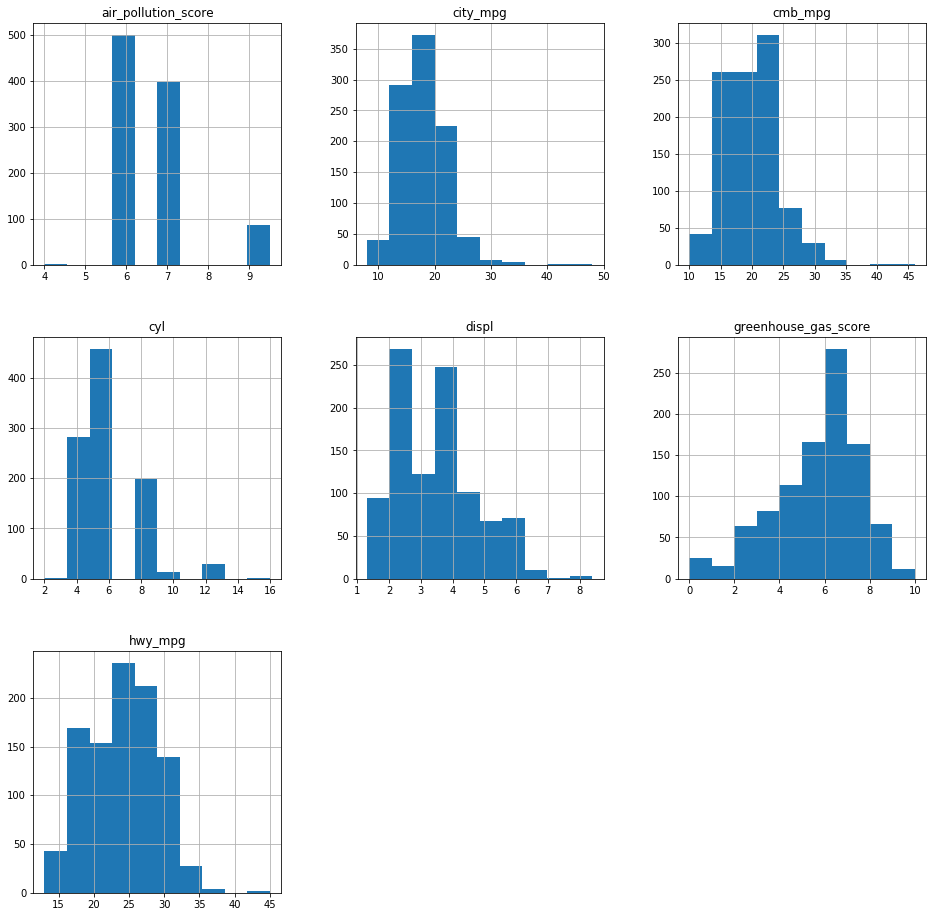

In [158]:
car08_df.hist(figsize=(16,16));

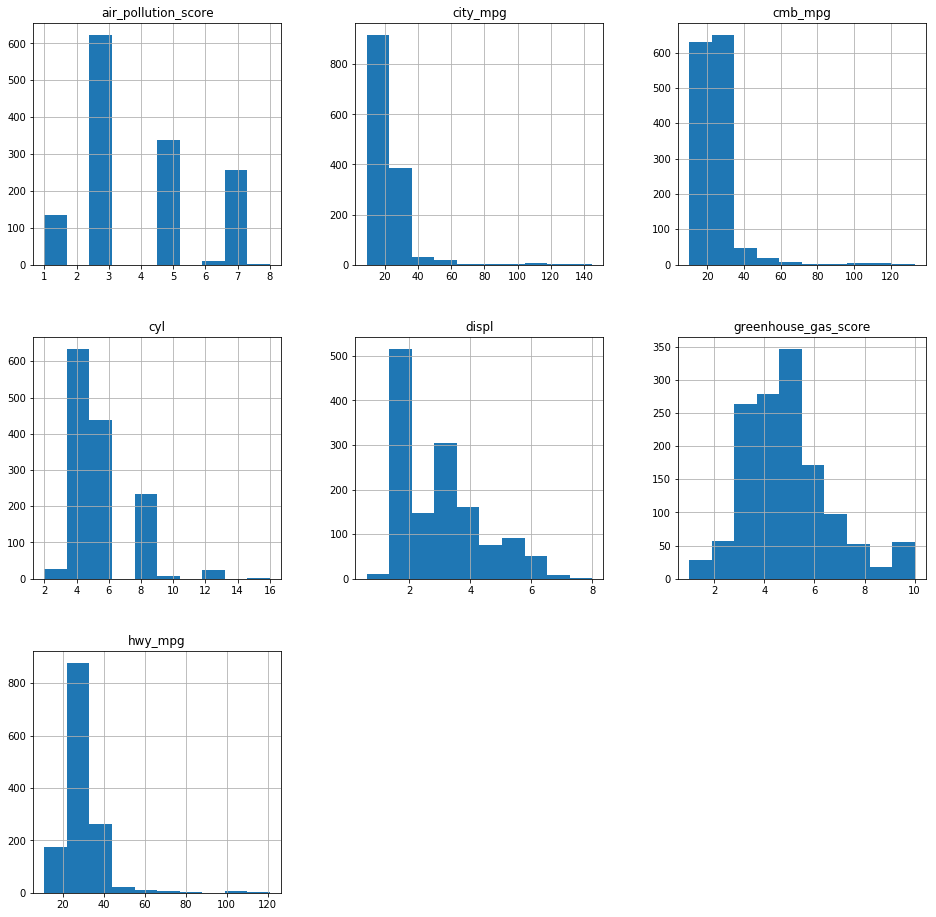

In [159]:
car18_df.hist(figsize=(16,16));

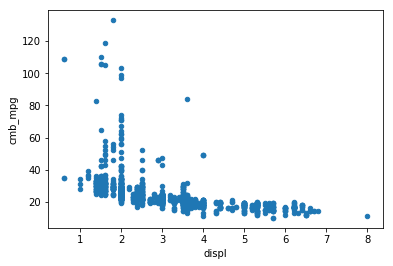

In [162]:
car18_df.plot(x='displ',y='cmb_mpg',kind='scatter');

In [163]:
car08_df.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'veh_class',
       'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

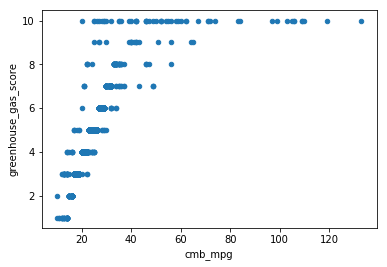

In [165]:
car18_df.plot(x='cmb_mpg',y='greenhouse_gas_score',kind='scatter');

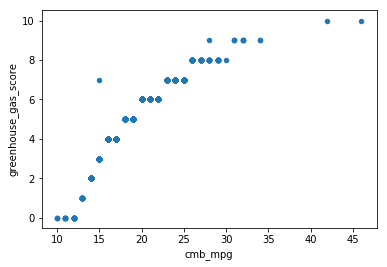

In [166]:
car08_df.plot(x='cmb_mpg',y='greenhouse_gas_score',kind='scatter');

In [168]:
car08_df.fuel.value_counts()

Gasoline    984
ethanol       1
CNG           1
gas           1
Name: fuel, dtype: int64

In [170]:
car18_df.fuel.value_counts()

Gasoline       1214
Ethanol          41
Gas              41
Diesel           37
Electricity      35
Name: fuel, dtype: int64

In [172]:
car08_df.plot(fuel,kind='bar');

NameError: name 'fuel' is not defined

In [173]:
# Create Bar charts
location = [1,2,3,4,5]
car08_df.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


### Q2: How much have vehicle classes improved in fuel economy?  

In [174]:
veh_08 = car08_df.groupby('veh_class')

In [183]:
veh_08.fuel.describe()

,count,unique,top,freq
veh_class,,,,
SUV,280,1,Gasoline,280
large car,55,1,Gasoline,55
midsize car,138,1,Gasoline,138
minivan,17,1,Gasoline,17
pickup,83,1,Gasoline,83
small car,333,4,Gasoline,330
station wagon,60,1,Gasoline,60
van,21,1,Gasoline,21


In [186]:
veh_08.get_group('SUV')

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
31,AUDI Q7,3.6,6,Auto-S6,4WD,Gasoline,SUV,6.0,14.0,20.0,16.0,4,no
32,AUDI Q7,4.2,8,Auto-S6,4WD,Gasoline,SUV,6.0,12.0,17.0,14.0,2,no
115,BMW X3,3.0,6,Man-6,4WD,Gasoline,SUV,7.0,18.0,26.0,21.0,6,yes
116,BMW X3,3.0,6,Auto-S6,4WD,Gasoline,SUV,7.0,19.0,26.0,22.0,6,yes
117,BMW X5,3.0,6,Auto-S6,4WD,Gasoline,SUV,7.0,17.0,23.0,19.0,5,no
118,BMW X5,4.8,8,Auto-S6,4WD,Gasoline,SUV,7.0,15.0,21.0,17.0,4,no
127,BUICK Enclave,3.6,6,Auto-L6,2WD,Gasoline,SUV,6.0,16.0,24.0,19.0,5,no
128,BUICK Enclave,3.6,6,Auto-L6,4WD,Gasoline,SUV,6.0,16.0,22.0,18.0,5,no
